##Overview of Google Play Store Capstone Project:

Part I
Objective: To predict if an app would have a high rating or low rating knowing its number of downloads, the category it belongs, number of reviews on playstore, and app size
1- Importing necessary tools
2- Data Preprocessing and Data Exploration
3- EDA and Feature Engineering
4- Correlation matrix
5- K-Nearest Neighbour Model
6- Random Forest Model
7-Summary

Part II (Project Extension)
Objective:
  a. To be able to recommend the developers what kind of free or paid application should they build for it to become successful.
  b. Which Month the app needs to be released inorder for it to become successful.

#a  
1- Google Play Store App success
a.Exploring the Data
b.Cleaning the Data
c.Analysing the Data (Free App):
 --Most Common Free Apps by Genre
 --Most Popular Free Apps by Genre
 --Most Popular Free Game Apps on Google Play Store
 --Summary
d.Analysing the Data (Paid App):
 --Most Common Paid Apps by Genre
 --Most Popular Paid Apps by Genre
 --Most Popular Paid Game Apps on Google Play Store
 --Summary

#b
2- Google Play Store App - Month?
a. Univariate analysis of Installs
b. Bivariate analysis of Installs
c. Content Rating Vs Installs
d. Category Vs Installs
e. Distribution of Installs Vs Rating
f. Box plot for Rating Versus Month
g. Plot Reviews Versus Month to see which month has higher reviews
h. Regression to Predict Installations
i. Summary




Part I:
Objective: To predict if an app would have a high rating or low rating knowing its number of downloads, the category it belongs, number of reviews on playstore, and app size

In [0]:
#Lets import the necessary tools:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [0]:
play_store_data = pd.read_csv('/content/googleplaystore.csv')

In [0]:
#Data Preprocessing and Data Exploration
play_store_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1/7/2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,1/15/2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,8/1/2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,6/8/2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,6/20/2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,3/26/2017,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,4/26/2018,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,6/14/2018,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,9/20/2017,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,7/3/2018,2.8,4.0.3 and up


In [0]:
play_store_data.shape

(10840, 13)

In [0]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


Observation: There are 10841 uncleaned samples for analysis with 13 columns. Only the Ratings column is represented as numeric. Other 'numeric' columns such as Size, number of installs, number of reviews need to be worked on

In [0]:
# Convert Reviews to numeric
play_store_data['Reviews'] = pd.to_numeric(play_store_data.Reviews, errors = 'coerce')

In [0]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [0]:
#Let's look closely at the apps in the data 
play_store_data.App.value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
8 Ball Pool                                           7
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
Subway Surfers                                        6
Bleacher Report: sports news, scores, & highlights    6
Temple Run 2                                          6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Helix Jump                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bowmasters                                            6
slither.io                                            6
Nick                                                  6
Skyscanner                                            5
MeetMe: Chat & Meet New People                  

Observation: App duplicates !
We will need to take care of the duplicate entries for Apps in the dataset, but let's see if there are differences between the App entries or they are exactly the same.

In [0]:
#Taking 3 sample Apps for exploration
play_store_data[play_store_data['App'].isin(['ROBLOX', 'Candy Crush Saga','Granny'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,7/5/2018,1.129.0.2,4.1 and up
1679,Granny,GAME,4.5,1135631,59M,"50,000,000+",Free,0,Teen,Arcade,5/29/2018,1.4.0.1,4.0 and up
1724,Granny,GAME,4.5,1137271,59M,"50,000,000+",Free,0,Teen,Arcade,5/29/2018,1.4.0.1,4.0 and up
1754,Granny,GAME,4.5,1137267,59M,"50,000,000+",Free,0,Teen,Arcade,5/29/2018,1.4.0.1,4.0 and up


Inspecting some of the duplicate values indicate that they have the same data with minor changes in their number of reviews during crawling.
We can therefore drop duplicates of each App keeping the one with the highest review at the time


In [0]:
# Sort App in Ascending order of reviews
play_store_data_sorted = play_store_data.sort_values(by = ['App', 'Reviews'], ascending = True)

#drops other duplicate entries keeping the App with the highest reviews
play_store_data_sorted.drop_duplicates('App',keep='last',inplace=True)

In [0]:
#Let's verify that duplicates has been removed
play_store_data_sorted.App.value_counts().head(10)

Traditional Chinese Medicine Fangfang Liangfang Daquan - Practical and ancient Chinese medicine and old prescriptions for the treatment of various incurable diseases    1
BL Kennedy Theme                                                                                                                                                         1
Video Editor,Crop Video,Movie Video,Music,Effects                                                                                                                        1
Waplog - Free Chat, Dating App, Meet Singles                                                                                                                             1
Hisnul Al Muslim - Hisn Invocations & Adhkaar                                                                                                                            1
CG Districts                                                                                                                                     

In [0]:
play_store_data_sorted.shape

(9659, 13)

Observation: Data sample has been redured to 9660 from 10841 samples due to duplicate entries

In [0]:
# Let's check out the App categories
play_store_data_sorted.Category.value_counts()

FAMILY                 1878
GAME                    945
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [0]:
# Drop the category named 1.9, unknown category
play_store_data_sorted[play_store_data_sorted['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [0]:
#Observation: What is a 1.9 category? That has to be removed or given the correct value. We go with remove.

In [0]:
play_store_data_sorted = play_store_data_sorted.drop([10472])

In [0]:
#Let's check for null values and start dealing with them.
play_store_data_sorted.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Observation: Ratings is not given for over 15 percent of the data. which is necessary for my analysis.
We will have to remove rows with NA ratings since this is what we will be predicting.

In [0]:
play_store_data_sorted.dropna(axis = 0, inplace = True, subset = ['Rating'])

Type Conversions from Object to Numeric
Size in Megabyte (1e6), Kilobyte (1e3) and a 3rd option, "Varies with Device"
Number of Instals, removing "+" and ","

Working on Size column
The column currently contains alphanumeric values. We call a function to work on the strings and convert to numbers

In [0]:
play_store_data_sorted.Size.value_counts()

Varies with device    1170
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
82k                      1
556k                     1
351k                     1
154k                     1
656k                     1
Name: Size, Length: 414, dtype: int64

In [0]:
#Convert non numeric values in App size to NAN
play_store_data_sorted['Size'][play_store_data_sorted['Size'] == 'Varies with device'] = np.nan

#Replace M with 1 million and k with 1 thousand
play_store_data_sorted['Size'] = play_store_data_sorted.Size.str.replace('M', 'e6')
play_store_data_sorted['Size'] = play_store_data_sorted.Size.str.replace('k', 'e3')

#convert column to numeric, dropping non numeric values
play_store_data_sorted['Size'] = pd.to_numeric(play_store_data_sorted['Size'], errors = 'coerce')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
play_store_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 324 to 882
Data columns (total 13 columns):
App               8195 non-null object
Category          8195 non-null object
Rating            8195 non-null float64
Reviews           8195 non-null int64
Size              7025 non-null float64
Installs          8195 non-null object
Type              8195 non-null object
Price             8195 non-null object
Content Rating    8195 non-null object
Genres            8195 non-null object
Last Updated      8195 non-null object
Current Ver       8191 non-null object
Android Ver       8193 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 896.3+ KB


In [0]:
#Observation: Ratings, Reviews and Size are now numeric columns.
#Let's move on to Installs
play_store_data_sorted['Installs'].value_counts()

1,000,000+        1415
100,000+          1095
10,000+            986
10,000,000+        936
1,000+             696
5,000,000+         607
500,000+           503
50,000+            457
5,000+             425
100+               302
50,000,000+        204
500+               199
100,000,000+       189
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

In [0]:
# To eliminate the '+' and ',' signs and convert to numeric
play_store_data_sorted['Installs'] = play_store_data_sorted.Installs.str.replace('+', '')
play_store_data_sorted['Installs'] = play_store_data_sorted.Installs.str.replace(',', '')

# Convert to numeric type
play_store_data_sorted['Installs'] = pd.to_numeric(play_store_data_sorted['Installs'], errors = 'coerce')

In [0]:
play_store_data_sorted['Installs'].value_counts()

1000000       1415
100000        1095
10000          986
10000000       936
1000           696
5000000        607
500000         503
50000          457
5000           425
100            302
50000000       204
500            199
100000000      189
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [0]:
#Create bins for the Install size as it was given in data
#Get the bin levels
bin_array = play_store_data_sorted.Installs.sort_values().unique()
#convert to array
bins = [x for x in bin_array]

# Added 5 billion for the higher range of app installs
bins.append(5000000000)

In [0]:
#Create bins for Installs
play_store_data_sorted['Installs_binned'] = pd.cut(play_store_data_sorted['Installs'], bins)

# Digitize the bins for encoding
Installs_digitized = np.digitize(play_store_data_sorted['Installs'], bins = bins )

#Add to the data frame as a column
play_store_data_sorted = play_store_data_sorted.assign(Installs_d = pd.Series(Installs_digitized).values)

In [0]:
play_store_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 324 to 882
Data columns (total 15 columns):
App                8195 non-null object
Category           8195 non-null object
Rating             8195 non-null float64
Reviews            8195 non-null int64
Size               7025 non-null float64
Installs           8195 non-null int64
Type               8195 non-null object
Price              8195 non-null object
Content Rating     8195 non-null object
Genres             8195 non-null object
Last Updated       8195 non-null object
Current Ver        8191 non-null object
Android Ver        8193 non-null object
Installs_binned    8192 non-null category
Installs_d         8195 non-null int64
dtypes: category(1), float64(2), int64(3), object(9)
memory usage: 969.3+ KB


Data cleaning done for the prediction

In [0]:
play_store_data_sorted.describe()

,Rating,Reviews,Size,Installs,Installs_d
count,8195.000000,8.195000e+03,7.025000e+03,8.195000e+03,8195.000000
mean,4.173264,2.555156e+05,2.176095e+07,9.189343e+06,11.125686
std,0.536286,1.985830e+06,2.272826e+07,5.826629e+07,3.206172
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,1.000000
25%,4.000000,1.270000e+02,4.900000e+06,1.000000e+04,9.000000
50%,4.300000,3.017000e+03,1.300000e+07,1.000000e+05,11.000000
75%,4.500000,4.394750e+04,3.100000e+07,1.000000e+06,13.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,19.000000


Observation:
The rating is on a scale of 1 - 5 with 1 being minimum and 5 being maximum
The mean rating is 4.17 while the median rating is 4.3. This implies that average rating is greater than 4.1
The minimum App size is 8.5 kb with maximum size being 100 Mb

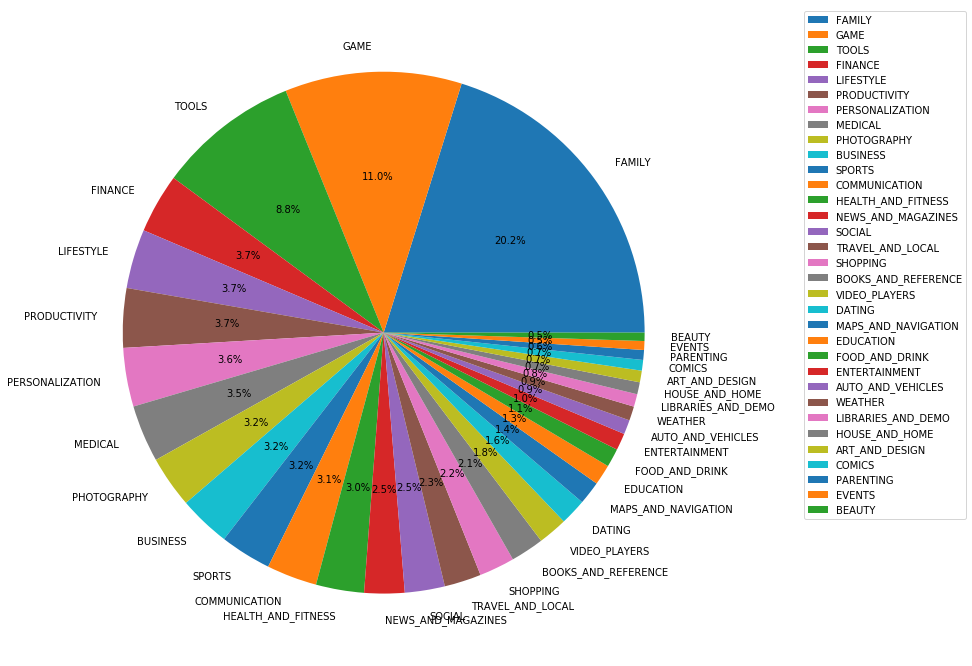

In [0]:
#EDA and Feature Engineering:
#Visualising the percetages of CATEGORIES in the playstore
temp = play_store_data_sorted['Category'].value_counts().reset_index() #A temporary dataframe for this plot

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

The FAMILY, EVENTS and TOOLS are the most dominating applications in the playstore

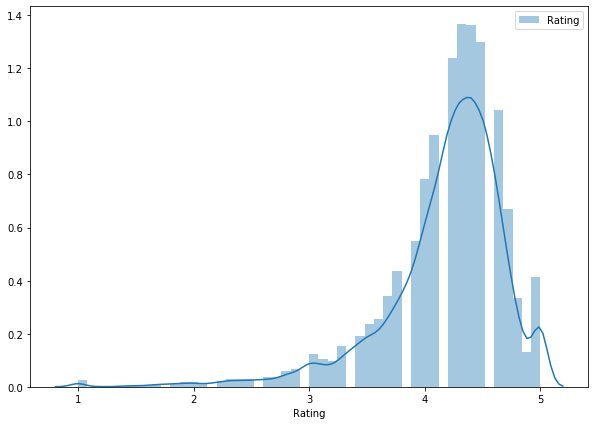

In [0]:
#Rating
plt.figure(figsize=(10,7))
sns.distplot(play_store_data_sorted['Rating'])
plt.legend(['Rating'])
plt.show()

In [0]:
print("The average rating in the appstore is ",np.average(play_store_data_sorted['Rating']))

The average rating in the appstore is  4.173264185478951


In [0]:
#Visualising the most often rated catgories
top = np.array(play_store_data_sorted.Category.value_counts().reset_index()['index'])
print("Most Occuring Categories\n",top[:6])

Most Occuring Categories
 ['FAMILY' 'GAME' 'TOOLS' 'FINANCE' 'LIFESTYLE' 'PRODUCTIVITY']


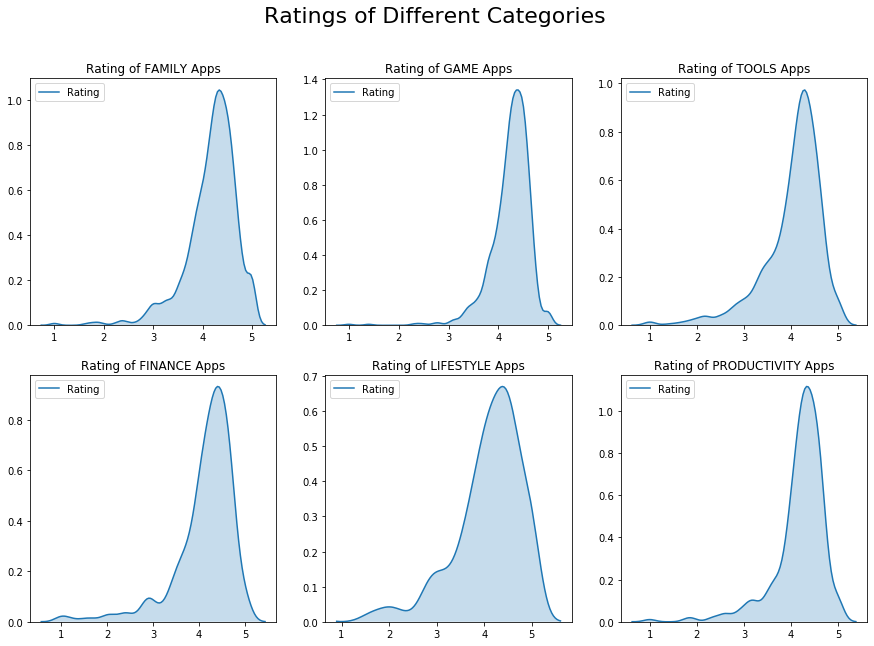

In [0]:
plt.figure(figsize= (15,10))
plt.suptitle("Ratings of Different Categories",fontsize = 22)

plt.subplot(2,3,1)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'FAMILY']['Rating'], shade = True)
plt.title('Rating of FAMILY Apps')

plt.subplot(2,3,2)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'GAME']['Rating'], shade = True)
plt.title('Rating of GAME Apps')


plt.subplot(2,3,3)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'TOOLS']['Rating'], shade = True)
plt.title('Rating of TOOLS Apps')


plt.subplot(2,3,4)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'FINANCE']['Rating'], shade = True)
plt.title('Rating of FINANCE Apps')


plt.subplot(2,3,5)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'LIFESTYLE']['Rating'], shade = True)
plt.title('Rating of LIFESTYLE Apps')


plt.subplot(2,3,6)
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Category'] == 'PRODUCTIVITY']['Rating'], shade = True)
plt.title('Rating of PRODUCTIVITY Apps')

plt.show()

We can observe that ratings vary according to the categories

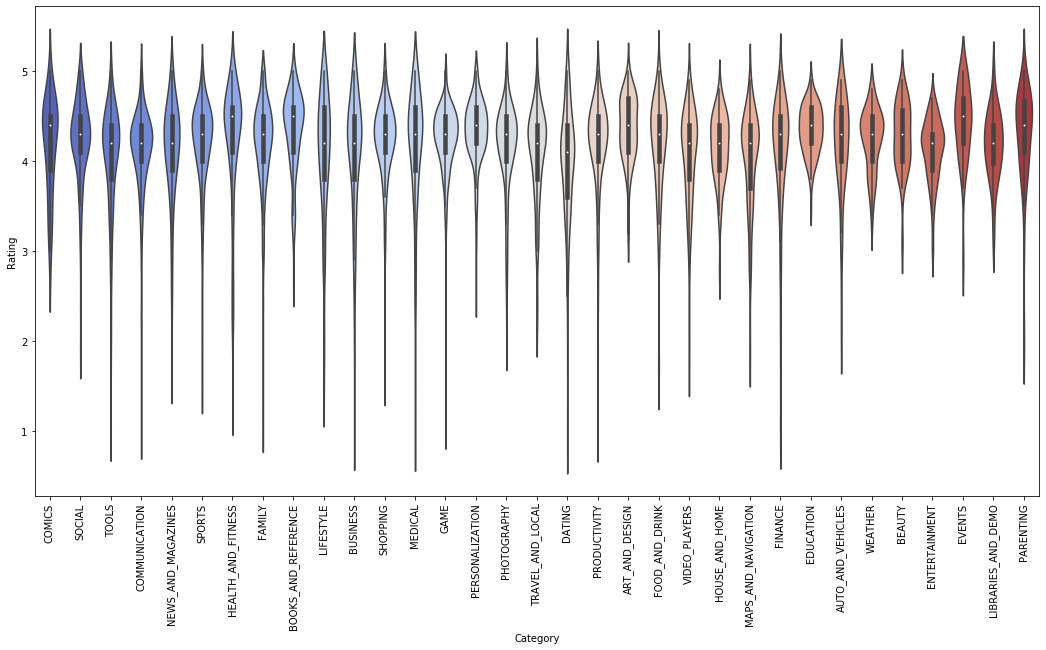

In [0]:
plt.figure(figsize=(18,9))
f = sns.violinplot(x = play_store_data_sorted['Category'], y = play_store_data_sorted['Rating'], palette= 'coolwarm')
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

Categories like EVENTS , BOOKS_AND_REFERENCE and HEALTH_AND_FITNESS are the best performing with more than half of the apps rated above average.
While categories like DATING are worst performing.

In [0]:
#Reviews
print(play_store_data_sorted['Reviews'].head())

324       115
8532    40467
4541      259
4636      573
5940       27
Name: Reviews, dtype: int64


Text(0.5, 1.0, 'Distribution of Ratings')

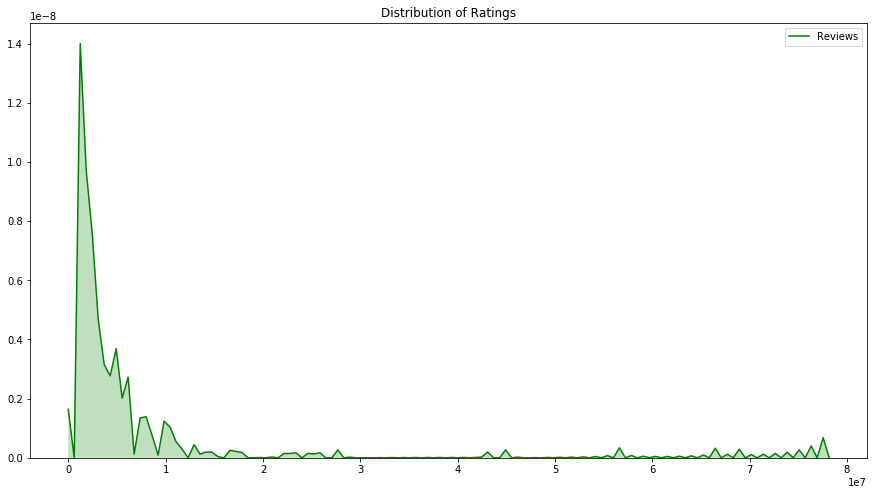

In [0]:
plt.figure(figsize=(15,8))
sns.kdeplot(play_store_data_sorted['Reviews'], color = 'Green', shade = True)
plt.title('Distribution of Ratings')

In [0]:
print("Number of Apps with more than 1M reviews",play_store_data_sorted[play_store_data_sorted['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",play_store_data_sorted[play_store_data_sorted['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 350

Top 20 apps with most reviews: 
 2544                                             Facebook
381                                    WhatsApp Messenger
2604                                            Instagram
382              Messenger – Text and Video Chat for Free
1879                                       Clash of Clans
4005              Clean Master- Space Cleaner & Antivirus
1917                                       Subway Surfers
3665                                              YouTube
7536    Security Master - Antivirus, VPN, AppLock, Boo...
1878                                         Clash Royale
1966                                     Candy Crush Saga
420           UC Browser - Fast Download Private & Secure
2610                                             Snapchat
4568      360 Security - Free Antivirus, Booster, Cleaner
1908                                       My Talking Tom
1871                                          8 Bal

For all apps


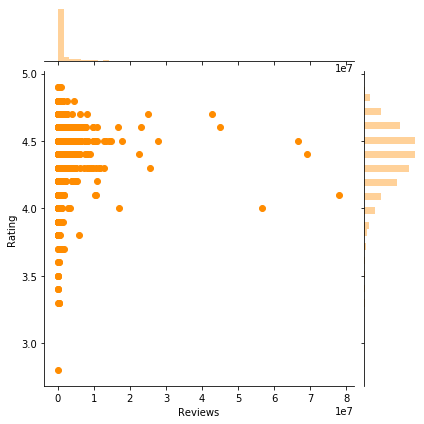

For apps below 1M reviews


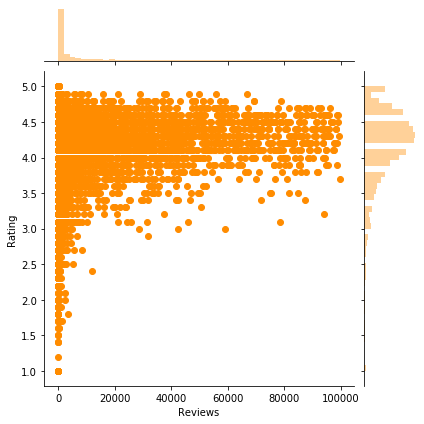

In [0]:
#Ratings vs Reviews
print("For all apps")
sns.jointplot(x = 'Reviews', y= 'Rating',data = play_store_data_sorted[play_store_data_sorted['Reviews']>100000], color = 'darkorange') 
plt.show()

print("For apps below 1M reviews")
sns.jointplot(x = 'Reviews', y= 'Rating',data = play_store_data_sorted[play_store_data_sorted['Reviews']<100000], color = 'darkorange') 
plt.show()

Observation: (Joint Scatter Plot)
The most reviewed apps are likely to be better rated as well

In [0]:
#Installs
play_store_data_sorted['Installs'].dtype

dtype('int64')

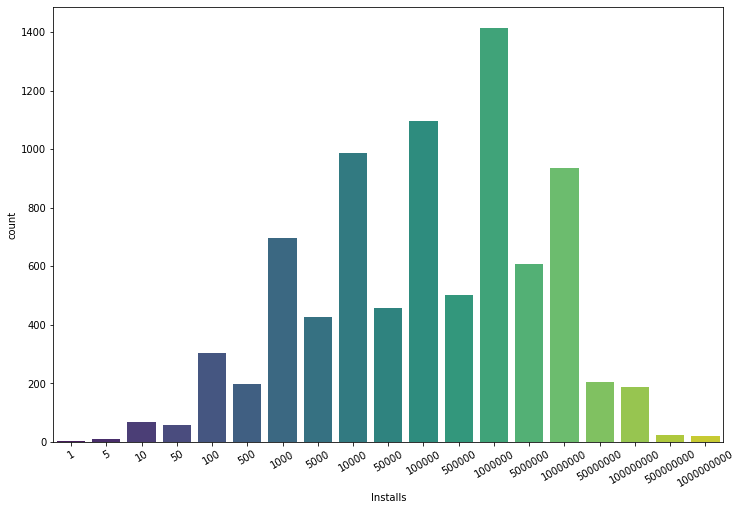

In [0]:
plt.figure(figsize=(12,8))
f = sns.countplot(play_store_data_sorted['Installs'], palette= "viridis" )
f.set_xticklabels(f.get_xticklabels(), rotation = 30)
plt.show()

We can observe that largest number of apps belong to 1M+ installs

We can treat these values as intervals and map them to numeric categories as:
5+ installs --> 1
50+ installs --> 2

In [0]:
sorted_values = sorted(play_store_data_sorted['Installs'].unique())
play_store_data_sorted['Installs Classes'] = play_store_data_sorted['Installs'].replace(sorted_values, range(0,len(sorted_values)))
play_store_data_sorted['Installs Classes'].head()

324      8
8532    12
4541     8
4636     8
5940     4
Name: Installs Classes, dtype: int64

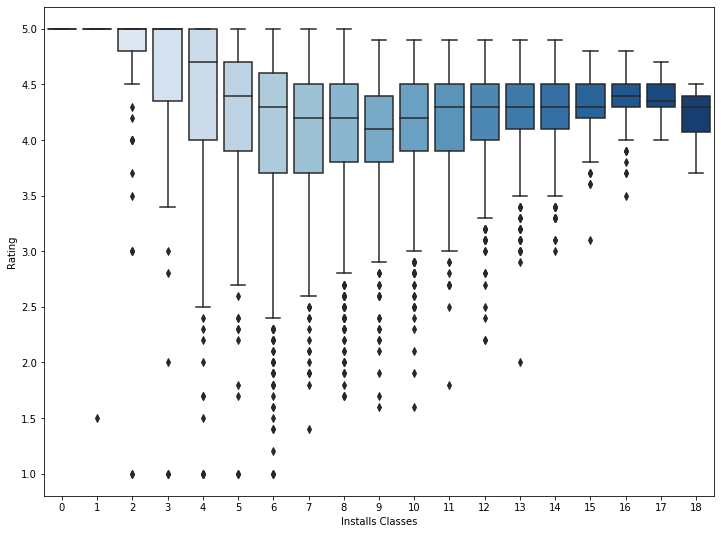

In [0]:
plt.figure(figsize=(12,9))
sns.boxplot(y = play_store_data_sorted['Rating'], x = play_store_data_sorted['Installs Classes'], palette= 'Blues')
plt.show()

It seems that there is less variation in Rating of apps with higher Installs

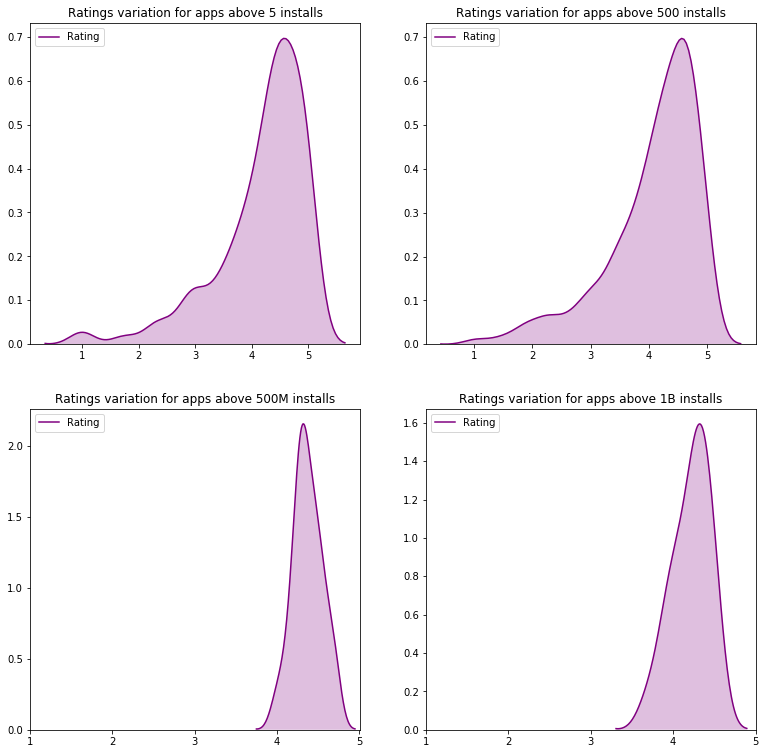

Variation in Rating of installs above 100 installs  0.19220659514434993
Variation in Rating of installs above 500 installs  0.19363738392269741
Variation in Rating of installs above 500M installs  0.03972695926593183
Variation in Rating of installs above 1B installs  0.05212709974548004


In [0]:
import scipy.stats as sp

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
f = sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 5]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 5 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,2)
f = sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 6]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,3)
f = sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 17]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500M installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,4)
f = sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 18]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 1B installs")
f.set_xticks([1,2,3,4,5])

plt.show()
print("Variation in Rating of installs above 100 installs ",sp.variation(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 5]['Rating']))
print("Variation in Rating of installs above 500 installs ",sp.variation(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 6]['Rating']))
print("Variation in Rating of installs above 500M installs ",sp.variation(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 17]['Rating']))
print("Variation in Rating of installs above 1B installs ",sp.variation(play_store_data_sorted[play_store_data_sorted['Installs Classes'] == 18]['Rating']))


From the above distributions it is evident that higher installed apps have less variation in their ratings.

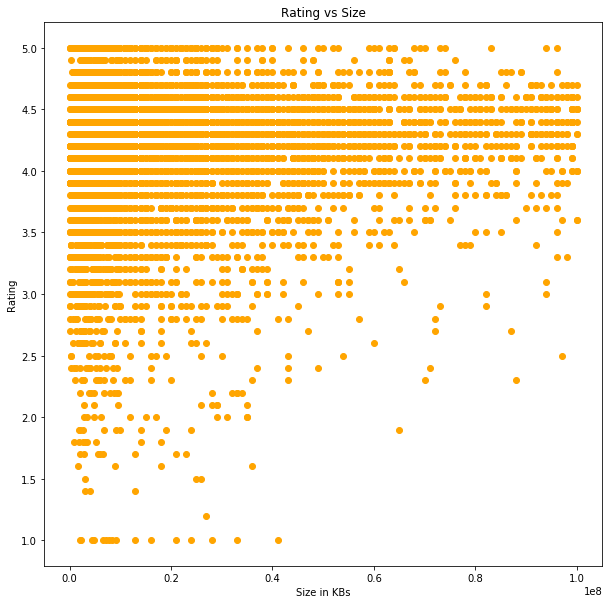

In [0]:
#Rating vs Size
plt.figure(figsize=(10,10))
plt.scatter(x = play_store_data_sorted['Size'], y = play_store_data_sorted['Rating'], color = 'orange')
plt.xlabel('Size in KBs')
plt.ylabel('Rating')
plt.title('Rating vs Size')
plt.show()

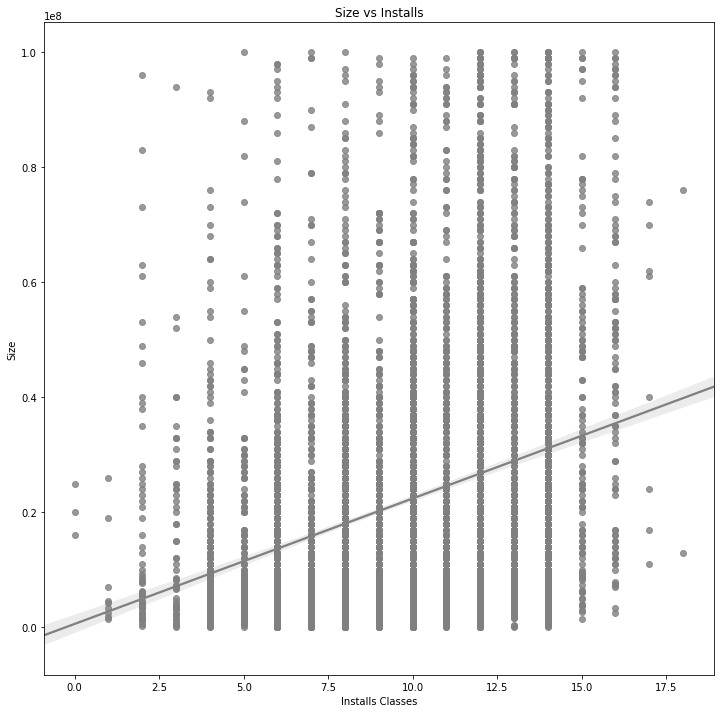

In [0]:
plt.figure(figsize= (12,12))
sns.regplot(y = play_store_data_sorted['Size'], x = play_store_data_sorted['Installs Classes'], color = 'grey')
plt.title('Size vs Installs')
plt.show()

It is pretty evident from the plot that mid-sized apps tend to perform mostly better.

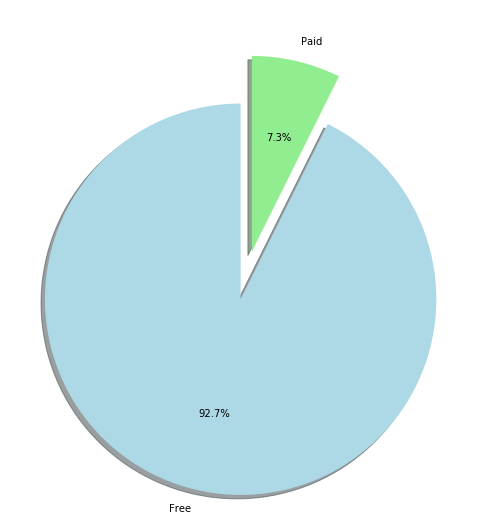

In [0]:
#Type

temp = play_store_data_sorted['Type'].value_counts().reset_index()

# plt.figure(figsize=(9,9))
rcParams['figure.figsize'] = 9,9
plt.pie(x = temp['Type'], labels= temp['index'], autopct= '%1.1f%%', colors = ['lightblue','lightgreen'], 
        shadow= True, explode=(0.25,0), startangle= 90)
plt.show()

Only 7.3% of the Apps in the store are paid apps

In [0]:
#Price
play_store_data_sorted['Price'] = play_store_data_sorted['Price'].apply(lambda x: x.replace('$',''))
play_store_data_sorted['Price'] = play_store_data_sorted['Price'].astype('float')

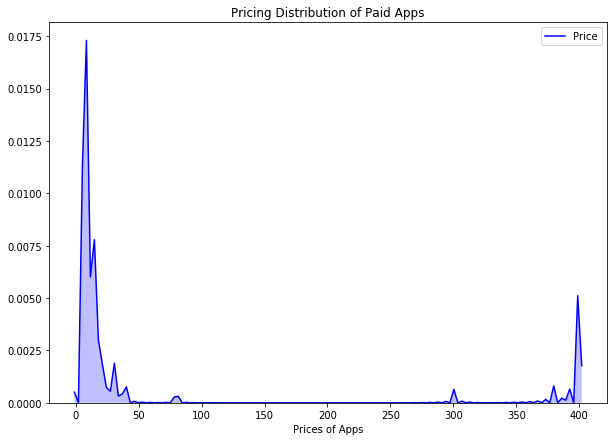

In [0]:
plt.figure(figsize=(10,7))
sns.kdeplot(play_store_data_sorted[play_store_data_sorted['Type'] == 'Paid']['Price'], color = 'blue', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

We can observe that even in the paid apps most of the apps are cheap!

In [0]:
#Rating vs Pricing
paid_prices = play_store_data_sorted[play_store_data_sorted['Type'] == 'Paid']['Price']


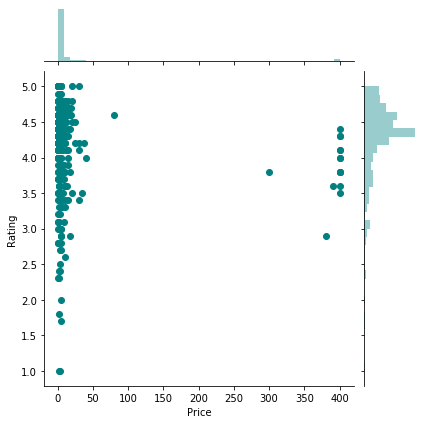

In [0]:
sns.jointplot(y = play_store_data_sorted[play_store_data_sorted['Type'] == 'Paid']['Rating'], x = play_store_data_sorted[play_store_data_sorted['Type'] == 'Paid']['Price'], color= 'teal')
plt.show()

The above suggests that even the most expensive apps do not have exceptionally better rating and even less rated than many cheaper apps.

We can better visualize pricing by breaking them down in different intervals.

In [0]:
play_store_data_sorted.loc[play_store_data_sorted['Price'] == 0,'Price_Class'] = 'Free'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 0) & (play_store_data_sorted['Price'] <=1), 'Price_Class'] = 'Cheap'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 1) & (play_store_data_sorted['Price'] <=3), 'Price_Class'] = 'Above Cheap'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 3) & (play_store_data_sorted['Price'] <=6), 'Price_Class'] = 'Average'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 6) & (play_store_data_sorted['Price'] <=16), 'Price_Class'] = 'Above Average'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 16) & (play_store_data_sorted['Price'] <=40), 'Price_Class'] = 'Expensive'
play_store_data_sorted.loc[(play_store_data_sorted['Price'] > 40), 'Price_Class'] = 'Too Expensive'

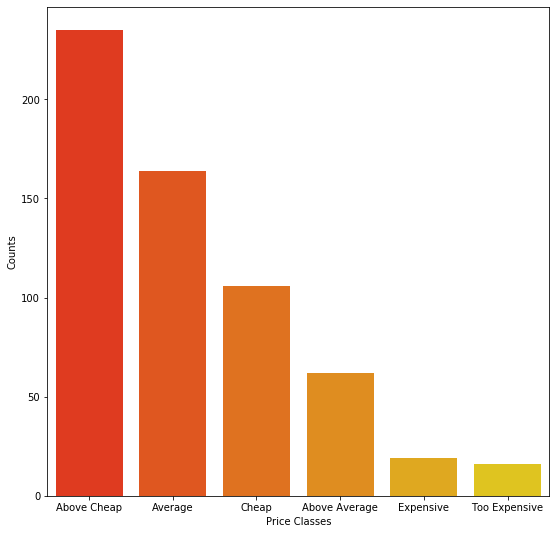

In [0]:
temp = play_store_data_sorted[play_store_data_sorted['Type'] == 'Paid']['Price_Class'].value_counts().reset_index()


sns.barplot(x = temp['index'], y = temp['Price_Class'], palette= 'autumn')
plt.xlabel('Price Classes')
plt.ylabel('Counts')
plt.show()

Pricing of the Apps is found to be mostly above Average(Normal)

In [0]:
play_store_data_sorted[['Price_Class','Rating','Reviews']].groupby('Price_Class').mean()

,Rating,Reviews
Price_Class,,
Above Average,4.232258,47013.209677
Above Cheap,4.292340,7488.893617
Average,4.245732,5814.926829
Cheap,4.300943,8849.924528
Expensive,4.205263,1040.157895
Free,4.166219,274905.152377
Too Expensive,3.912500,571.312500


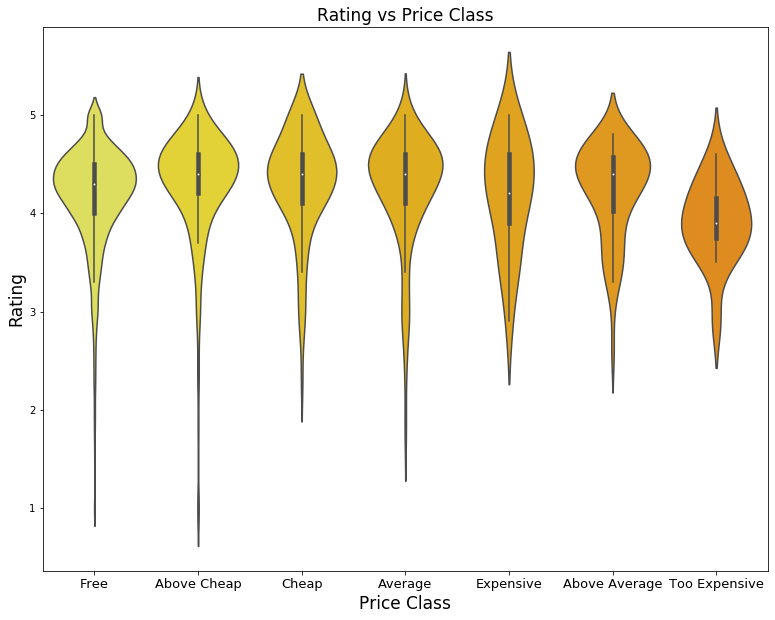

In [0]:
plt.figure(figsize=(13,10))
f = sns.violinplot(x = play_store_data_sorted['Price_Class'], y = play_store_data_sorted['Rating'], palette= 'Wistia')
f.set_xticklabels(f.get_xticklabels(), fontdict= {'fontsize':13})
f.set_xlabel('Price Class', fontdict= {'fontsize':17})
f.set_ylabel('Rating', fontdict= {'fontsize':17})
f.set_title('Rating vs Price Class',fontdict= {'fontsize':17})
plt.show()

As can be observed the Too Expensive apps have average Rating less than others.

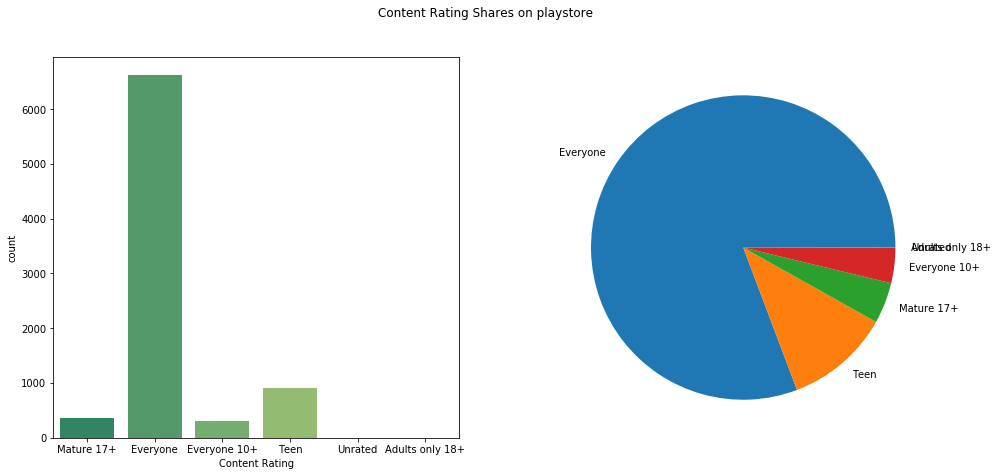

In [0]:
#ContentRating
plt.figure(figsize=(16,7))
plt.suptitle('Content Rating Shares on playstore')
plt.subplot(1,2,1)
sns.countplot(x = play_store_data_sorted['Content Rating'], palette='summer')

plt.subplot(1,2,2)
temp = play_store_data_sorted['Content Rating'].value_counts().reset_index()
plt.pie(x = temp['Content Rating'], labels = temp['index'])

plt.show()

As observed the Adult or Unrated apps are almost nil

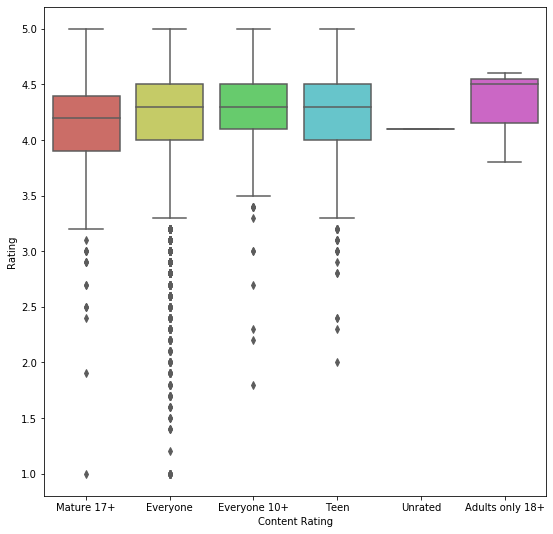

In [0]:
sns.boxplot(x = play_store_data_sorted['Content Rating'], y = play_store_data_sorted['Rating'], palette= 'hls')

There is not much effect of the Content Rating on the Rating, the better rating trend in adult and unrated apps is due to very few observations.

In [0]:
#Genre
play_store_data_sorted['Genres'].head()

324               Comics
8532              Social
4541               Tools
4636       Communication
5940    News & Magazines
Name: Genres, dtype: object

In [0]:
play_store_data_sorted['Genres'].unique()

array(['Comics', 'Social', 'Tools', 'Communication', 'News & Magazines',
       'Sports', 'Health & Fitness', 'Education', 'Books & Reference',
       'Puzzle', 'Lifestyle', 'Business', 'Shopping', 'Medical', 'Board',
       'Action', 'Personalization', 'Casual', 'Arcade', 'Photography',
       'Travel & Local', 'Dating', 'Productivity', 'Art & Design',
       'Entertainment', 'Simulation', 'Food & Drink',
       'Video Players & Editors', 'Racing', 'Adventure', 'House & Home',
       'Maps & Navigation', 'Finance', 'Educational;Education',
       'Education;Education', 'Casino', 'Card', 'Auto & Vehicles',
       'Weather', 'Beauty', 'Events', 'Music', 'Libraries & Demo',
       'Role Playing', 'Trivia', 'Entertainment;Creativity', 'Strategy',
       'Casual;Action & Adventure', 'Board;Brain Games',
       'Parenting;Music & Video', 'Casual;Pretend Play', 'Educational',
       'Parenting', 'Travel & Local;Action & Adventure',
       'Role Playing;Action & Adventure', 'Education;Pretend

In [0]:
play_store_data_sorted['Genres'].value_counts()

Tools                                  718
Entertainment                          471
Education                              429
Finance                                302
Productivity                           301
                                      ... 
Puzzle;Education                         1
Comics;Creativity                        1
Lifestyle;Education                      1
Health & Fitness;Action & Adventure      1
Tools;Education                          1
Name: Genres, Length: 114, dtype: int64

Many of the Genres in the column have sub-genres so we better omit them

In [0]:
play_store_data_sorted['Genres'] = play_store_data_sorted['Genres'].apply(lambda x: x.split(';')[0])
play_store_data_sorted['Genres'].unique()

array(['Comics', 'Social', 'Tools', 'Communication', 'News & Magazines',
       'Sports', 'Health & Fitness', 'Education', 'Books & Reference',
       'Puzzle', 'Lifestyle', 'Business', 'Shopping', 'Medical', 'Board',
       'Action', 'Personalization', 'Casual', 'Arcade', 'Photography',
       'Travel & Local', 'Dating', 'Productivity', 'Art & Design',
       'Entertainment', 'Simulation', 'Food & Drink',
       'Video Players & Editors', 'Racing', 'Adventure', 'House & Home',
       'Maps & Navigation', 'Finance', 'Educational', 'Casino', 'Card',
       'Auto & Vehicles', 'Weather', 'Beauty', 'Events', 'Music',
       'Libraries & Demo', 'Role Playing', 'Trivia', 'Strategy',
       'Parenting', 'Word', 'Music & Audio'], dtype=object)

In [0]:
play_store_data_sorted['Genres'].value_counts()

Tools                      719
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            298
Medical                    290
Sports                     270
Photography                263
Business                   263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     133
Puzzle                     123
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

As we can observe that Music and Music & Audio are redundant so we better convert them as one.

In [0]:
play_store_data_sorted['Genres'].replace('Music & Audio','Music', inplace = True)
play_store_data_sorted['Genres'].value_counts().tail()

Beauty    42
Casino    37
Trivia    28
Music     22
Word      22
Name: Genres, dtype: int64

In [0]:
#Geting the mean Rating and Reviews of each genre.
temp = play_store_data_sorted[['Genres','Rating','Reviews']].groupby(by = 'Genres').mean().sort_values(by = 'Rating',ascending = False)
print(temp.head(1))
print(temp.tail(1))

          Rating      Reviews
Genres                       
Events  4.435556  3568.666667
          Rating       Reviews
Genres                        
Dating  3.980451  27245.180451


As observed the Dating genre is the least rated on average, but there is not a very vast difference to the highest averagely rated Events genre.

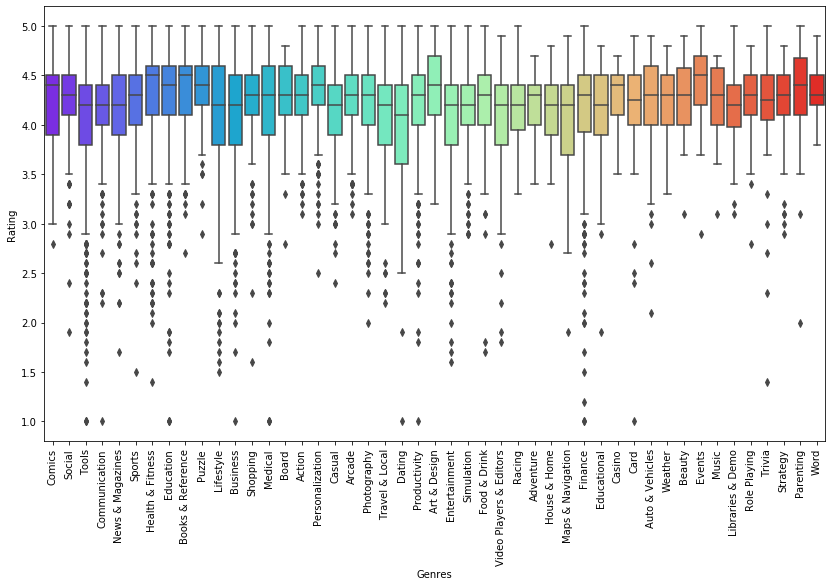

In [0]:
plt.figure(figsize=(14,8))
f = sns.boxplot(x = play_store_data_sorted['Genres'], y = play_store_data_sorted['Rating'], palette= 'rainbow')
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

In [0]:
del play_store_data_sorted['Installs_d']

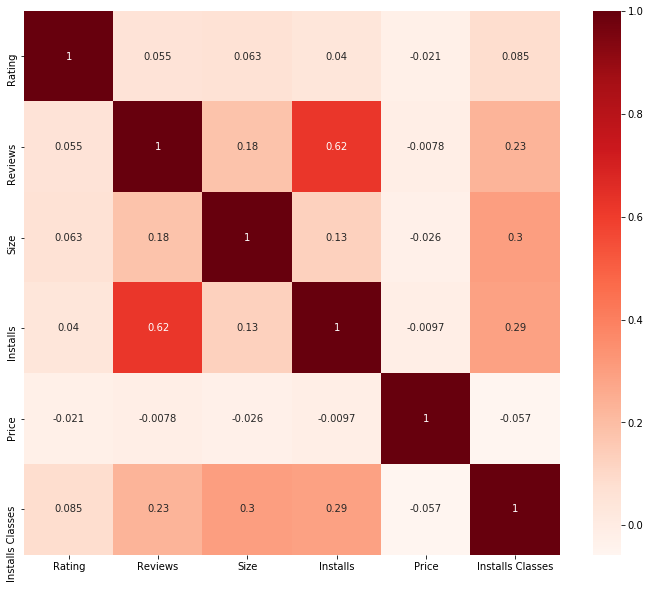

In [0]:
#Exploring_Correlations
plt.figure(figsize=(12,10))
sns.heatmap(play_store_data_sorted.corr(), annot = True, cmap = 'Reds')
plt.show()

There's one noticeable strong relation between Reviews and Installs which could mean that people tend to review(likely download) the apps more reviewed than most rated.

Machine Learning - Predicting Ratings
Using ['Category', 'Reviews', 'Size' , 'Installs'] to predict 'Rating'

In [0]:
#as most machine learning models do not work well with NA, We have to drop rows having them.
attributes = ['Category', 'Reviews', 'Size' , 'Installs Classes','Rating']
psa = play_store_data_sorted[attributes].dropna().copy()
psa.shape

(7025, 5)

Observation: 7020 samples are available for my training and testing
A.Convert Ratings to two categories
High rating -: 3.5 - 5.0
Low Rating -: < 3.5

In [0]:
#convert ratings to high and low categories.
Rating_cat = dict()
for i in range(0,len(psa['Rating'])):
    if psa['Rating'].iloc[i] >= 3.5:
        Rating_cat[i] = 'High'
    else: Rating_cat[i] = 'Low'
        
#Add the categorical column to the data 
psa = psa.assign(Rating_cat = pd.Series(Rating_cat).values)

In [0]:
psa['Rating_cat'].value_counts()

High    6354
Low      671
Name: Rating_cat, dtype: int64

In [0]:
#drop the Ratings column
psa = psa.drop(['Rating'], axis = 1)

#To encode the Ratings labels for learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
psa['Rating_cat'] = le.fit_transform(psa['Rating_cat'])

In [0]:
#To view the encoded labels
list(le.classes_)

['High', 'Low']

In [0]:
#Applying One-Hot Encoding to the Categorical Column 'Category' and 'Installs_d'
psa_encode = pd.get_dummies(psa, columns= ['Category','Installs Classes'])
print(psa_encode.columns)

Index(['Reviews', 'Size', 'Rating_cat', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Installs Classes_0',
       'Installs Classes_1', 'Installs Classes_2', 'Install

In [0]:
X = psa_encode.drop(['Rating_cat'], axis = 1)
y = psa_encode['Rating_cat']

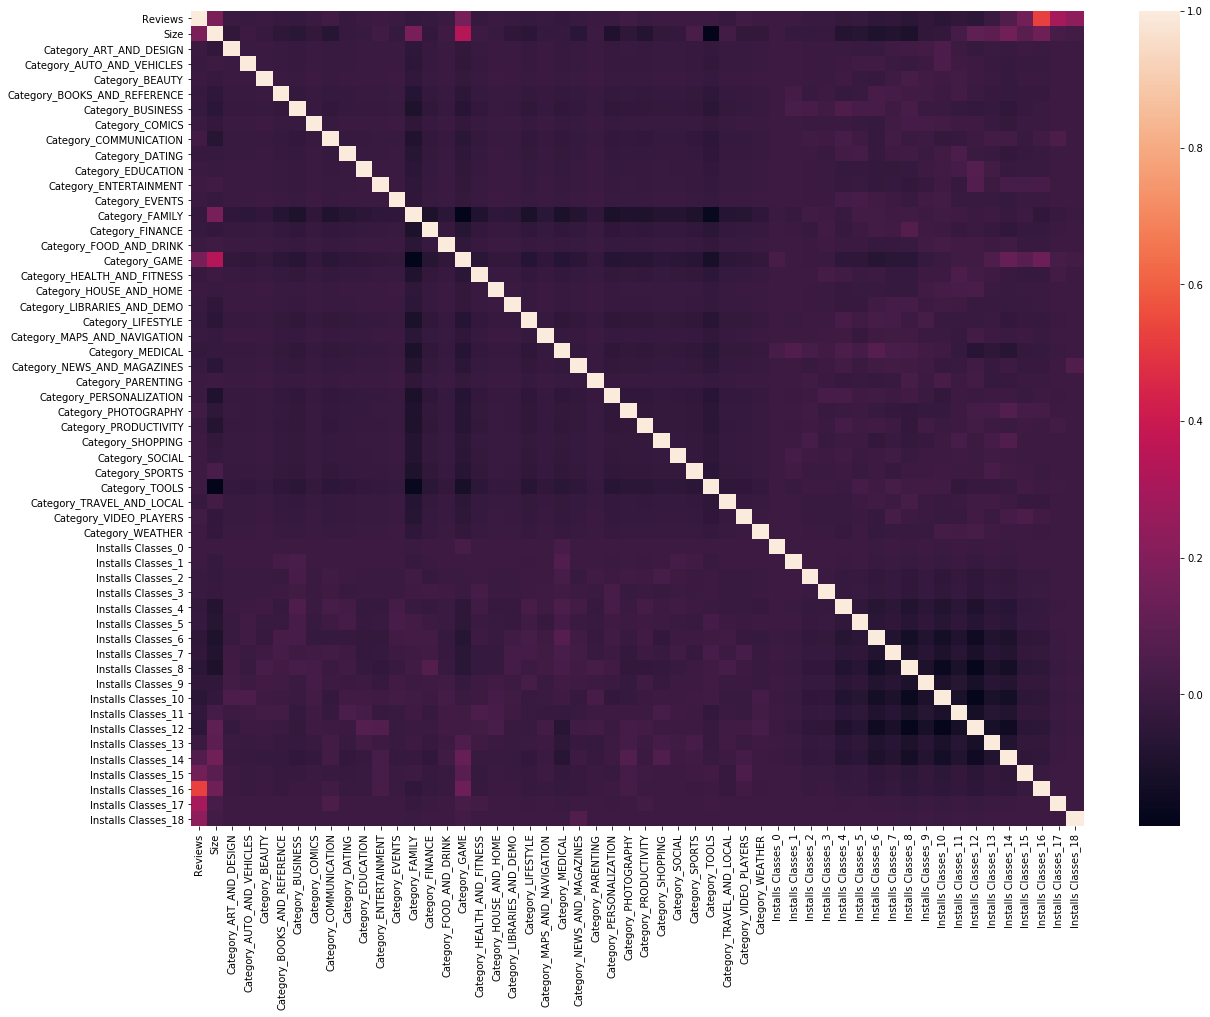

In [0]:
#Checking for correlation using heatmap
plt.figure(figsize=(20,15)) 

sns.heatmap(X.corr())

In [0]:
#Apply K- Nearest Neighbour to model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
print('Training Set Score: {} \nTest Set Score: {}'.format(knn.score(X_train, y_train),knn.score(X_test, y_test) ))

Training Set Score: 0.9998101746393319 
Test Set Score: 0.8389299943084804


Observation: The model seems to have overfitted the data

In [0]:
# Looking for optimum value of n_neighbours for the dataset.
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train);
    print('For n = {}, Test = {}, Train = {}'.format(i,knn.score(X_train, y_train),knn.score(X_test, y_test) ))

For n = 1, Test = 0.9998101746393319, Train = 0.8389299943084804
For n = 2, Test = 0.9189445709946849, Train = 0.8929994308480365
For n = 3, Test = 0.9187547456340167, Train = 0.8770631758679568
For n = 4, Test = 0.9083143507972665, Train = 0.900398406374502
For n = 5, Test = 0.9086940015186029, Train = 0.8924302788844621
For n = 6, Test = 0.90584662110858, Train = 0.900398406374502


Observation: n_neighbours = 4 seems to optimise the model.
the model performance can be judged on the Accuracy metric.

In [0]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_depth = 10, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.906
Accuracy on test set: 0.904


We can apply this model to a sample and be correct 90% of the time.

As we can see that both of the algorithms Knn and Random forest gives good accuracy with approx 90%, therefore these algorithms can be used for Predicting Ratings. 

#Summary:

#The rating is on a scale of 1 - 5 with 1 being minimum and 5 being maximum
#The mean rating is 4.17 while the median rating is 4.3. This implies that average rating is greater than 4.1
#The minimum App size is 8.5 kb with maximum size being 100 Mb
#The FAMILY, EVENTS and TOOLS are the most dominating applications in the playstore
#Categories like EVENTS , BOOKS_AND_REFERENCE and HEALTH_AND_FITNESS are the best performing with more than half of the apps rated above average.
#While categories like DATING are worst performing.
#The most reviewed apps are likely to be better rated as well
#It seems that there is less variation in Rating of apps with higher Installs
#Higher installed apps have less variation in their ratings.
#Mid-sized apps tend to perform mostly better.
#Only 7.3% of the Apps in the store are paid apps
#We can observe that even in the paid apps most of the apps are cheap!
#Even the most expensive apps do not have exceptionally better rating and even less rated than many cheaper apps.
#Pricing of the Apps is found to be mostly above Average(Normal)
#Too Expensive apps have average Rating less than others.
#The Adult or Unrated apps are almost nil
#There is not much effect of the Content Rating on the Rating, the better rating trend in adult and unrated apps is due to very few observations.
#The Dating genre is the least rated on average, but there is not a very vast difference to the highest averagely rated Events genre.
#There's one noticeable strong relation between Reviews and Installs which could mean that people tend to review(likely download) the apps more reviewed than most rated.
#For Knn we can choose n_neighbours = 4 which seems to optimise the model.
#Both Knn and Random forest algorithms can be used for predicting Ratings as the performance metric which is Accuracy is approx 90%.




#Project Extension
#Part II:

#Google Play Store App success


Objective:
  a. To be able to recommend the developers what kind of free or paid application should they build for it to become successful.
  b. Which Month the app needs to be released inorder for it to become successful.
  c. Regression model to predict Installations

In [0]:
#a

#Exploring the Data
from csv import reader

#Google Play data set:
opened_file = open('/content/googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android_body = android[1:]

#Google Play Store Apps which contains 9960 apps.

In [0]:
#To explore these data sets easily, We will create a function called f_explore_data:
def f_explore_data(dataset, start, end, no_rows_columns = False):
    data_slice = dataset[start:end]
    for row in data_slice:
        print(row)
        print('\n')
    if no_rows_columns:
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))

In [0]:
print(android_header)
print('\n')
f_explore_data(android_body, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', '1/7/2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', '1/15/2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', '8/1/2018', '1.2.4', '4.0.3 and up']


Number of rows:  10840
Number of columns:  13


Number of rows (10841 rows) of Google Play data set doesn't match number of unique apps (9960 apps) we mentioned above.
It means there are bunch of duplications in this data.

In [0]:
#I.Cleaning the Data
# 1. Deleting wrong data
print(android_header)
print('\n')
print(android_body[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', '8/7/2018', '6.06.14', '4.4 and up']


In [0]:
#Rating in this row is 19 which is wrong because maximum 
#rating of Google Play App is 5. As a consequence, it will be deleted.
del android_body[10472]

In [0]:
#2. Removing duplicate row:
#We already know our data sets have so many duplications. For instance, Instagram has four entries:

print(android_header)
print('\n')
for row in android_body:
    v_app_name = row[0]
    if v_app_name == 'Instagram':
        print(row)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '7/31/2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '7/31/2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '7/31/2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '7/31/2018', 'Varies with device', 'Varies with device']


In [0]:
# Build function f_find_duplication to find how many duplications are there in each data set
def f_find_duplication(dataset, index):
    l_duplicate_app = []
    l_unique_app = []
    
    for row in dataset:
        v_app_name = row[index]
        if v_app_name in l_unique_app:
            l_duplicate_app.append(v_app_name)
        else:
            l_unique_app.append(v_app_name)
    
    print('Number of duplicate apps: ', len(l_duplicate_app))
    print('Number of unique apps: ', len(l_unique_app))

In [0]:
f_find_duplication(android_body, 0)

Number of duplicate apps:  1180
Number of unique apps:  9659


Google Play data set has 9659 unique apps. This is correct because we deleted one row due to error.
Remove 1181 duplicate apps from Google Play data set. 
But randomly removing them is not a good choice. Look closely Instagram's
entries, we can see four different number of reviews. This issue could also happen to other apps. What we want is to keep greatest number of reviews because it seems latest entry of an app.

In [0]:
d_reviews_max = {}

for row in android_body:
    v_app_name = row[0]
    v_reviews_max = int(row[3])
    if (v_app_name in d_reviews_max) and (v_reviews_max > d_reviews_max[v_app_name]):
        d_reviews_max[v_app_name] = v_reviews_max
    elif v_app_name not in d_reviews_max:
        d_reviews_max[v_app_name] = v_reviews_max

print('Number of unique apps in d_reviews_max dictionary: ', len(d_reviews_max))

Number of unique apps in d_reviews_max dictionary:  9659


In [0]:
#Let's double check Instagram's reviews in d_reviews_max:
print('Number of Instagram\'s reviews: ',d_reviews_max['Instagram'])

Number of Instagram's reviews:  66577446


In [0]:
#So far, so good. Now we will use the dictionary to remove duplications
l_android_clean = []
already_added = []

for row in android_body:
    v_app_name = row[0]
    v_reviews_max = int(row[3])
    if (v_app_name not in already_added) and (v_reviews_max == d_reviews_max[v_app_name]):
        l_android_clean.append(row)
        already_added.append(v_app_name)
        
print('Number of unique apps in l_android_clean: ',len(l_android_clean))

Number of unique apps in l_android_clean:  9659


In [0]:
#Double check with Instagram's reviews in l_android_clean:
print(android_header)
print('\n')
for row in l_android_clean:
    v_app_name = row[0]
    if v_app_name == 'Instagram':
        print(row)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '7/31/2018', 'Varies with device', 'Varies with device']


Everything is as expected. All unwanted rows were removed. The next step is removing non-English applications.

In [0]:
# 3. Removing non-English apps:¶
#We can use built-in function ord(). This function will return integer of a character. English words are made of
#127 standard characters called ASCII code (abbreviated from American Standard Code for Information Interchange). 
#To filter non-english apps, we can create a function f_is_english that will
#return False if output of ord(input_string) greater than 127 and vice versa.

def f_is_english(v_string):
    for v_character in v_string:
        if ord(v_character) > 127:
            return False
    return True

In [0]:
f_is_english('Instagram')

True

In [0]:
f_is_english('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

In [0]:
f_is_english('Docs To Go™ Free Office Suite')

False

We did some tests and could see the fuction is not good enough. It cannot dectect 'Docs To Go™ Free Office Suite' 

To help the funtion recognizes these apps as english apps, we would add one more condition to f_is_english:

In [0]:
def f_is_english(v_string):
    v_count = 0
    
    for character in v_string:
        if ord(character) > 127:
            v_count += 1
            if v_count > 3:
                return False
    return True

In [0]:
f_is_english('Docs To Go™ Free Office Suite')

True

In [0]:
#Now let's use this funtion to filter the data set:
l_android_english = []
l_ios_english = []

for row in l_android_clean:
    v_app_name = row[0]
    if f_is_english(v_app_name):
        l_android_english.append(row)

In [0]:
print('Number of english Android apps: ', len(l_android_english))

Number of english Android apps:  9614


Up until now, We have done:

-Deleted wrong entry
-Removed duplicate entries
-Filtered non-english apps

The final step of cleaning process is isolating free apps from data sets.

In [0]:
# --Free app
# 4. Isolating the Free Apps:
l_android_final = []


for row in l_android_english:
    price = row[7]
    price = price.replace('$','')
    price = price.replace('Everyone', '0')
    price = float(price)
    if price == 0.0:
        l_android_final.append(row)
        
print('Number of free Android apps: ',len(l_android_final))

Number of free Android apps:  8864


We have finished with cleaning the data set. There are 8864 Android left. 
Lets begin our analysis to find out what kind of free app is best for it to become successful.

II. Analysing the Data:
1. Most Common Free Apps by Genre:
We will need to build two functions to answer the question "What are the most common free Apps by Genre?":
First, a function f_freq_table to show frequency in percentage of each Genre.
Second, a function f_freq_table_desc to show percentages in a descending order.

In [0]:
def f_freq_table(dataset, index):
    d_freq_table = {}
    
    for row in dataset:
        v_genre = row[index]
        if v_genre in d_freq_table:
            d_freq_table[v_genre] += 1
        else:
            d_freq_table[v_genre] = 1
    
    d_freq_table_percent = {}
    for key in d_freq_table:
        v_genre_percent = (d_freq_table[key] / len(dataset)) * 100
        d_freq_table_percent[key] = v_genre_percent
        
    return d_freq_table_percent

def f_freq_table_desc(dataset, index):
    d_table = f_freq_table(dataset, index)
    l_table_display = []
    
    for key in d_table:
        v_tuple = (float(d_table[key]), key)
        l_table_display.append(v_tuple)
        
    l_table_display = sorted(l_table_display, reverse = True)
    for row in l_table_display:
        print(row[1], ':', row[0])

In [0]:
f_freq_table_desc(l_android_final, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

Family and Game looks like the common genre in free apps. Right now, building a free game application might be 
a good choice.
It doesn't cost many resources. Flappy Bird for example. Not only graphic and content are very simple, 
but also very addicted.


In [0]:
#2. Most Popular Free Apps by Genre:
#We can use column Installs to figure out popularity of each genre.

d_popular_genre = {}

for row in l_android_final:
    v_genre = row[1]
    v_installs = row[5]
    v_installs = v_installs.replace('+','')
    v_installs = v_installs.replace(',','')
    v_installs = int(v_installs)
    if v_genre in d_popular_genre:
        d_popular_genre[v_genre] += v_installs
    else:
        d_popular_genre[v_genre] = v_installs
        
l_table_display = []

for key in d_popular_genre:
    v_tuple = (d_popular_genre[key], key)
    l_table_display.append(v_tuple)
    
l_table_display = sorted(l_table_display, reverse = True)
for row in l_table_display:
    print(row[1], ':', row[0])


GAME : 13436869450
COMMUNICATION : 11036906201
TOOLS : 8101043474
FAMILY : 6193895690
PRODUCTIVITY : 5791629314
SOCIAL : 5487861902
PHOTOGRAPHY : 4656268815
VIDEO_PLAYERS : 3931731720
TRAVEL_AND_LOCAL : 2894704086
NEWS_AND_MAGAZINES : 2368196260
BOOKS_AND_REFERENCE : 1665884260
PERSONALIZATION : 1529235888
SHOPPING : 1400338585
HEALTH_AND_FITNESS : 1143548402
SPORTS : 1095230683
ENTERTAINMENT : 989460000
BUSINESS : 696902090
MAPS_AND_NAVIGATION : 503060780
LIFESTYLE : 497484429
FINANCE : 455163132
WEATHER : 360288520
FOOD_AND_DRINK : 211738751
EDUCATION : 188850000
DATING : 140914757
ART_AND_DESIGN : 113221100
HOUSE_AND_HOME : 97202461
AUTO_AND_VEHICLES : 53080061
LIBRARIES_AND_DEMO : 52995810
COMICS : 44971150
MEDICAL : 37732344
PARENTING : 31471010
BEAUTY : 27197050
EVENTS : 15973160


Based on the result above, it reinforces our idea of creating a free game application. The last thing we would like to know is: What kind of game does attract the most users?

In [0]:
# 3. Most Popular Free Game Apps on Google Play Store:

d_popular_game = {}

for row in l_android_final:
    v_app_name = row[0]
    v_genre = row[1]
    v_installs = row[5]
    v_installs = v_installs.replace('+','')
    v_installs = v_installs.replace(',', '')
    v_installs = int(v_installs)
    if v_genre == 'GAME':
        d_popular_game[v_app_name] = v_installs
        
l_popular_game = []

for key in d_popular_game:
    v_tuple = (d_popular_game[key], key)
    l_popular_game.append(v_tuple)

l_popular_game = sorted(l_popular_game, reverse = True)

for row in l_popular_game[:6]:
    print(row[1], ':',row[0])

Subway Surfers : 1000000000
Temple Run 2 : 500000000
Pou : 500000000
My Talking Tom : 500000000
Candy Crush Saga : 500000000
slither.io : 100000000


In [0]:
#Conclusion

Arcade and Casual are the most popular game genre on Android. But Pou and My Talking Tom are
most likely for children who might not really caught by ads. Candy Crush is a dominator in its category. 
Arcade game would be the best choice. Subway Surfers, Temple Run are endless runner mobile games. They are easy to 
play, nice graphic and users must pay attention during gameplay which is a good thing because they could see our ads.

Finally, what kind of free app the developers should build:

Arcade game
Nice graphic
Easy and fun to play like Subway Surfers, Temple Run, Candy Crush.
The longer users play, the more challenging it is like Flappy Bird.


In [0]:
#--Paid app
# 4. Isolating the Paid Apps:
l_android_final1 = []


for row in l_android_english:
    price = row[7]
    price = price.replace('$','')
    price = price.replace('Everyone', '0')
    price = float(price)
    if price != 0.0:
        l_android_final1.append(row)
        
print('Number of paid Android apps: ',len(l_android_final1))

Number of paid Android apps:  750


There are 750 Paid apps in the Google Play store.
Lets begin our analysis to find out what kind of paid app is best for it to become successful.

In [0]:
II. Analysing the Data:¶
1. Most Common Apps by Genre:
We will need to build two functions to answer the question "What are the most common Paid Apps by Genre?":
First, a function f_freq_table to show frequency in percentage of each Genre.
Second, a function f_freq_table_desc to show percentages in a descending order.

In [0]:
def f_freq_table(dataset, index):
    d_freq_table = {}
    
    for row in dataset:
        v_genre = row[index]
        if v_genre in d_freq_table:
            d_freq_table[v_genre] += 1
        else:
            d_freq_table[v_genre] = 1
    
    d_freq_table_percent = {}
    for key in d_freq_table:
        v_genre_percent = (d_freq_table[key] / len(dataset)) * 100
        d_freq_table_percent[key] = v_genre_percent
        
    return d_freq_table_percent

def f_freq_table_desc(dataset, index):
    d_table = f_freq_table(dataset, index)
    l_table_display = []
    
    for key in d_table:
        v_tuple = (float(d_table[key]), key)
        l_table_display.append(v_tuple)
        
    l_table_display = sorted(l_table_display, reverse = True)
    for row in l_table_display:
        print(row[1], ':', row[0])

In [0]:
f_freq_table_desc(l_android_final1, 1)

FAMILY : 24.266666666666666
MEDICAL : 10.933333333333334
GAME : 10.933333333333334
PERSONALIZATION : 10.8
TOOLS : 10.4
PRODUCTIVITY : 3.733333333333334
BOOKS_AND_REFERENCE : 3.733333333333334
COMMUNICATION : 3.5999999999999996
SPORTS : 3.2
PHOTOGRAPHY : 2.533333333333333
LIFESTYLE : 2.4
FINANCE : 2.2666666666666666
HEALTH_AND_FITNESS : 2.0
TRAVEL_AND_LOCAL : 1.6
BUSINESS : 1.6
WEATHER : 1.0666666666666667
MAPS_AND_NAVIGATION : 0.6666666666666667
DATING : 0.6666666666666667
VIDEO_PLAYERS : 0.5333333333333333
SOCIAL : 0.4
EDUCATION : 0.4
ART_AND_DESIGN : 0.4
SHOPPING : 0.26666666666666666
PARENTING : 0.26666666666666666
NEWS_AND_MAGAZINES : 0.26666666666666666
FOOD_AND_DRINK : 0.26666666666666666
ENTERTAINMENT : 0.26666666666666666
AUTO_AND_VEHICLES : 0.26666666666666666
LIBRARIES_AND_DEMO : 0.13333333333333333
EVENTS : 0.13333333333333333


Family looks like the most common genre. Right now, building a family application might be 
a good choice.

In [0]:
#2. Most Popular Paid Apps by Genre:
#We can use column Installs to figure out popularity of each genre.

d_popular_genre = {}

for row in l_android_final1:
    v_genre = row[1]
    v_installs = row[5]
    v_installs = v_installs.replace('+','')
    v_installs = v_installs.replace(',','')
    v_installs = int(v_installs)
    if v_genre in d_popular_genre:
        d_popular_genre[v_genre] += v_installs
    else:
        d_popular_genre[v_genre] = v_installs
        
l_table_display = []

for key in d_popular_genre:
    v_tuple = (d_popular_genre[key], key)
    l_table_display.append(v_tuple)
    
l_table_display = sorted(l_table_display, reverse = True)
for row in l_table_display:
    print(row[1], ':', row[0])

FAMILY : 21148714
GAME : 20999965
PERSONALIZATION : 3258794
PHOTOGRAPHY : 1878740
TOOLS : 1727441
PRODUCTIVITY : 1412055
COMMUNICATION : 1360050
SPORTS : 1243815
LIFESTYLE : 1179110
WEATHER : 812000
MEDICAL : 560733
HEALTH_AND_FITNESS : 474110
BUSINESS : 212775
ENTERTAINMENT : 200000
FINANCE : 185602
TRAVEL_AND_LOCAL : 183060
MAPS_AND_NAVIGATION : 121100
EDUCATION : 102000
VIDEO_PLAYERS : 71000
FOOD_AND_DRINK : 60000
PARENTING : 50100
AUTO_AND_VEHICLES : 50050
BOOKS_AND_REFERENCE : 23316
ART_AND_DESIGN : 16000
DATING : 10350
SHOPPING : 10100
SOCIAL : 6000
NEWS_AND_MAGAZINES : 5500
LIBRARIES_AND_DEMO : 100
EVENTS : 1


Based on the result above, it reinforces our idea of creating a family application. The last thing 
we would like to know is: What kind of paid game does attract the most users?

In [0]:
# 3. Most Popular Paid Family Apps on Google Play Store:

d_popular_family = {}

for row in l_android_final1:
    v_app_name = row[0]
    v_genre = row[1]
    v_installs = row[5]
    v_installs = v_installs.replace('+','')
    v_installs = v_installs.replace(',', '')
    v_installs = int(v_installs)
    if v_genre == 'FAMILY':
        d_popular_family[v_app_name] = v_installs
        
l_popular_family = []

for key in d_popular_family:
    v_tuple = (d_popular_family[key], key)
    l_popular_family.append(v_tuple)

l_popular_family = sorted(l_popular_family, reverse = True)

for row in l_popular_family[:6]:
    print(row[1], ':',row[0])

Minecraft : 10000000
Where's My Water? : 1000000
Infinity Dungeon VIP : 1000000
Cut the Rope GOLD : 1000000
Card Wars - Adventure Time : 1000000
Bloons TD 5 : 1000000


In [0]:
#Conclusion

Family apps are the most popular on Android. Family Apps similar to Minecraft, Where's My Water?, 
Infinity Dungeon VIP, Cut the Rope GOLD, Card Wars - Adventure Time and Bloons TD 5 can be built.

In [0]:
#b

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from pylab import rcParams
import calendar

In [0]:
#Import data
#Display first few records from the dataset
Play_Data = pd.read_csv('/content/googleplaystore.csv')
Play_Data.head()

#Lets see the number of apps and variables in the data set
Play_Data.shape
Play_Data.dtypes
Play_Data.isna().sum()
#Removing the Null values from the data set
#Rating column has 1474 NA values which need to be removed
Play = Play_Data.fillna(0)

#Change of Data Types and Transformation

Here we are converting Data Types of the following Variables - 

Size - Integer and Transforming data from 19M to 19,000,000
Installs - Integer and Transformaing data from 1000+ to 1000
Price - Float and Transforming from $4.99 to 4.99

In [0]:
Play = Play.drop([10472])


In [0]:
Play['Rating'] = Play['Rating'].replace(19, np.NaN)

In [0]:
#Converting Reviews from Object data to Integer Data Type
 Play['Reviews'] = Play['Reviews'].astype(int)
# Converting Size from object data type to String
Play['Size'] = Play['Size'].astype(str)
#Replaced Varies with device with Nan
#Replaced K with 1000 and M with 1000000 and changing data type to float
Play['Size'] = Play['Size'] .replace('Varies with device', np.nan)

Play['Size'] = (Play['Size'].replace(r'[kM]+$', '', regex=True).astype(float) * \
                                  Play['Size'].str.extract(r'[\d\.]+([kM]+)', expand=False)
                                    .fillna(1)
                                     .replace(['k','M'], [10**3, 10**6]).astype(int))
Play['Price'] = Play['Price'].replace({'\$':''}, regex = True)
Play['Price'] = Play['Price'].astype(float)
#Replacing 10000+ values with 10000 and changign the data type to float
Play['Installs'] = Play.Installs.str.replace("[+,]", "")
Play['Installs'] = Play['Installs'].astype(int)

In [0]:
Play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1/7/2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1/15/2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,8/1/2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,6/8/2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,6/20/2018,1.1,4.4 and up


In [0]:
#Univariate Analysis of Installs
def univariateAnalysis(featureName):
      mDB=pd.DataFrame({'Absolute_Frequency':featureName.value_counts()})    
      #get index of data as x axis and convert to an array
      x=mDB.index.values
      #get y and convert to an array
      y=mDB.Absolute_Frequency.values
     #scaling
      plt.figure(figsize=(8,8))
    #colors = sns.color_palette("CMRmap", len(db))
     #plotting
      BarplotDB=sns.barplot(x,y,palette="CMRmap")
      #get ticks and make it 90 degree to be visible clearly
      BarplotDB.set_xticklabels(BarplotDB.get_xticklabels(), rotation=90)

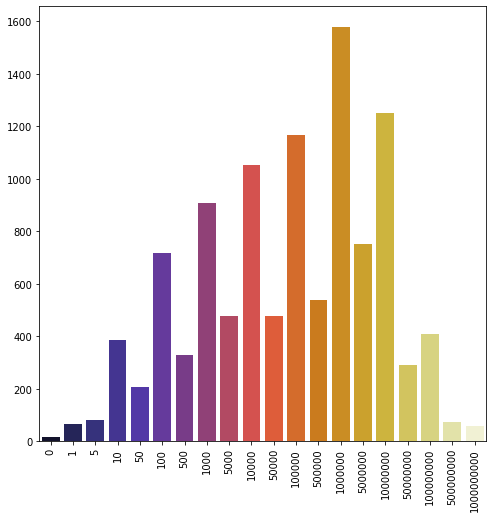

In [0]:
univariateAnalysis(Play['Installs'])

In [0]:
#Bivariate Analysis of Installs
def barplotAnalysis(x,y):
    
    plt.figure(figsize=(10,8))
    plt.xticks(rotation=90)
    #plotting
    sns.barplot(x,y,palette="CMRmap")


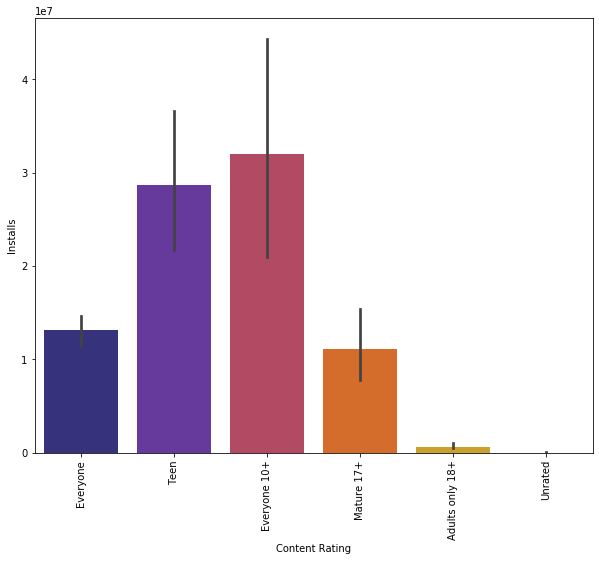

In [0]:
#Content Rating Vs Installs
barplotAnalysis(Play['Content Rating'],Play['Installs'])

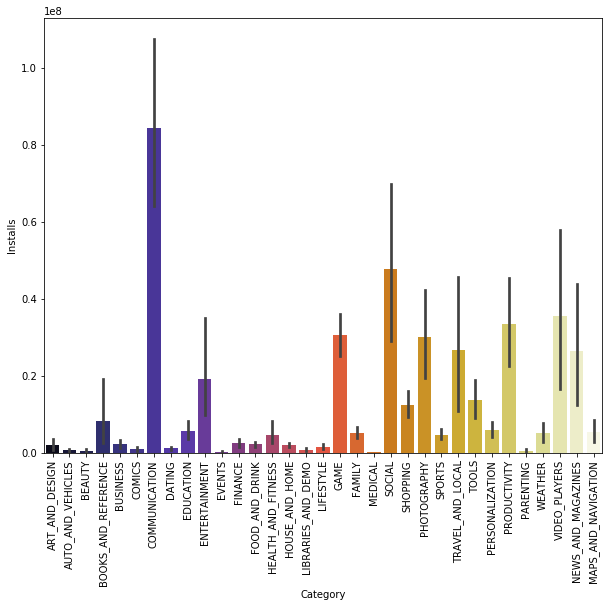

In [0]:
#Category Vs Installs
barplotAnalysis(Play['Category'],Play['Installs'])

In [0]:
#Distribution of Installs Vs Rating
data = Play.groupby('Installs')['Rating'].mean()
data = pd.DataFrame(data)
rat = data['Rating']
v = list(rat)
d2 = pd.DataFrame(data,columns=['Rating'])
d2['Rating']=v#creating to store the rating in column
d2 = d2.sort_index(axis=0,ascending=True)

rat = d2['Rating']
rat = np.array(rat)
print(d2)

              Rating
Installs            
0           0.000000
1           0.223881
5           0.506098
10          0.826684
50          1.207317
100         1.875243
500         2.543939
1000        3.196913
5000        3.644864
10000       3.871063
50000       3.949687
100000      4.043456
500000      4.160482
1000000     4.215516
5000000     4.243218
10000000    4.313509
50000000    4.351211
100000000   4.411491
500000000   4.350000
1000000000  4.258621


Here looking at the above output we can see the distribution of rating per downloads. That is 1000 downloads have 3.1 rating, 500000 downloads have 4.1 rating

In [0]:
#Android App Success - Month
import plotnine as p9

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


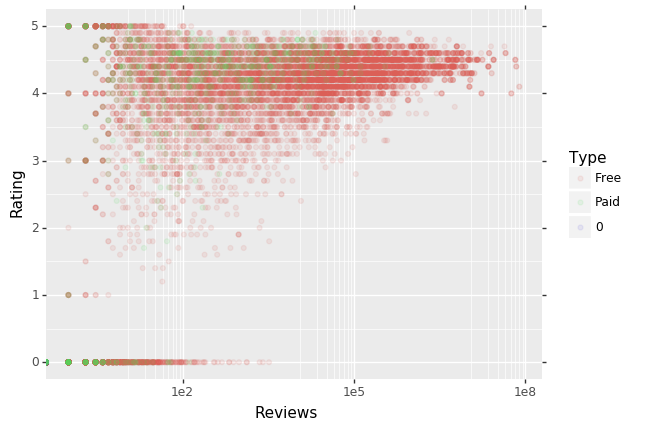

<ggplot: (-9223363289369625007)>

In [0]:
#Plot showing ratings versus reviews
(p9.ggplot(data=Play,
           mapping=p9.aes(x='Reviews', y='Rating', color='Type'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Reviews")
    + p9.scale_x_log10()
)

We can see that the number of reviews could boost your app rating, so it might be interesting to see if some other factors might help us get more reviews.

Let's check if the Android application Last Updated date might affect the number of reviews the app recieves.

First, I change the Last Updated into a date value, then I created a new column with just the month.

In [0]:
#Changing data type of Last Updated to Datetime and in the format of Year-Month- Date
Play['Last Updated'] = pd.to_datetime(Play['Last Updated'])
#Extracting Month from Last_updated column
Play['Month'] = Play['Last Updated'].dt.month
#Change Month data type from float to integer
Play.Month = Play.Month.astype('int64') 
Play.Month = Play.Month.apply(lambda x: calendar.month_abbr[x])

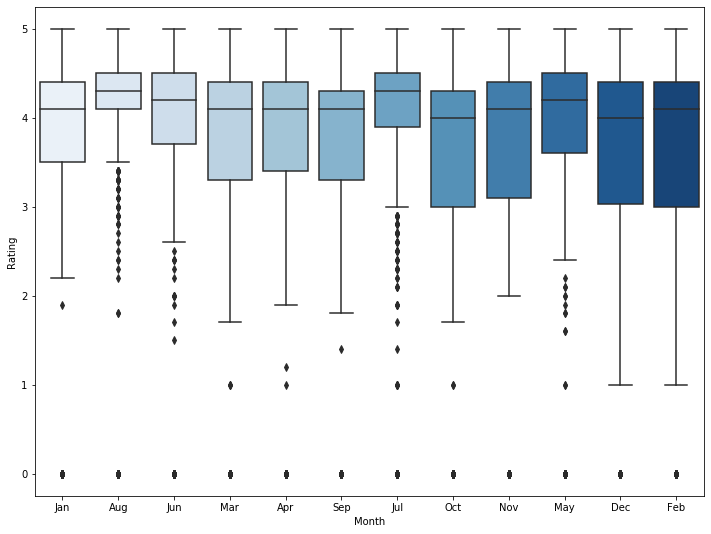

In [0]:
#Box plot for Rating Versus Month
plt.figure(figsize=(12,9))
sns.boxplot(y = Play['Rating'], x = Play['Month'], palette= 'Blues')
plt.show()

In [0]:
Average_Reviews = Play.groupby('Month', as_index=False)['Reviews'].mean().round(3)
Average_Reviews

,Month,Reviews
0,Apr,82590.899
1,Aug,1064313.557
2,Dec,59813.977
3,Feb,50053.296
4,Jan,33550.033
5,Jul,764017.585
6,Jun,257502.147
7,Mar,42552.562
8,May,151676.711
9,Nov,131833.204


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:80: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


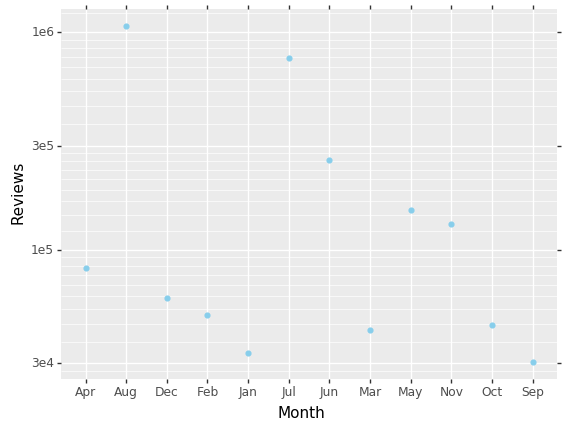

<ggplot: (8747485098437)>

In [0]:
#Plot Reviews Versus Month
(p9.ggplot(data=Average_Reviews,
           mapping=p9.aes(x='Month', y='Reviews'))
    + p9.geom_point(color='skyblue')
    + p9.geom_line()
    + p9.xlab("Month")
    + p9.scale_y_log10()
)

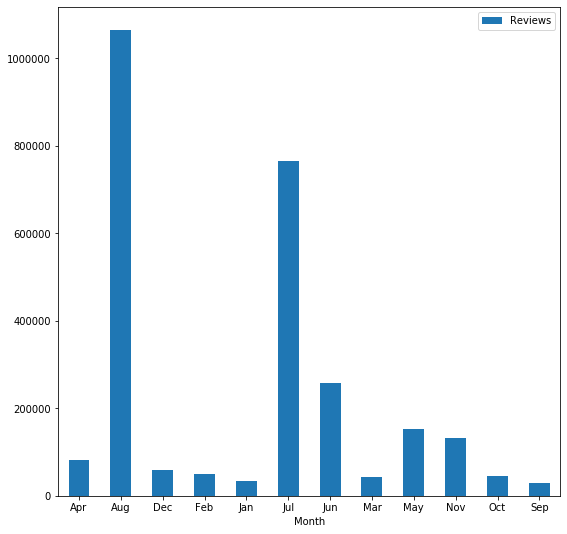

In [0]:
#Plot Reviews Versus Month to see which month has higher reviews
Average_Reviews.plot.bar(x='Month', y='Reviews', rot=0)

From these plots it can be seen, More number of reviews means often higher rating.

Lets check if the Last_Updated affects the number of installations

In [0]:
Average_Installs = Play.groupby('Month', as_index=False)['Installs'].mean().round(3)
Average_Installs

,Month,Installs
0,Apr,4.697833e+06
1,Aug,4.310005e+07
2,Dec,2.700352e+06
3,Feb,1.909871e+06
4,Jan,2.416495e+06
5,Jul,2.353554e+07
6,Jun,6.430642e+06
7,Mar,1.778154e+06
8,May,6.372511e+06
9,Nov,4.181830e+06


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:80: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


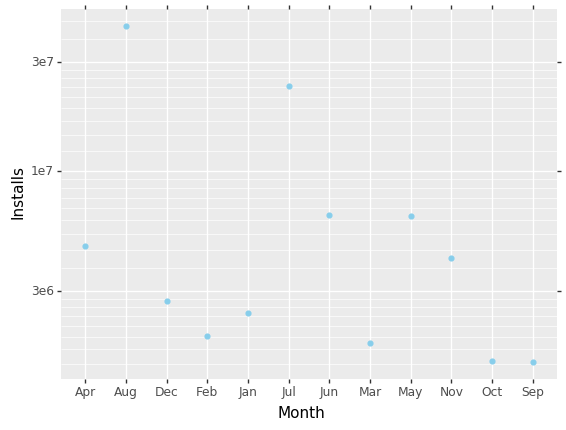

<ggplot: (8747484913735)>

In [0]:
#Plot Reviews Versus Month
(p9.ggplot(data=Average_Installs,
           mapping=p9.aes(x='Month', y='Installs'))
    + p9.geom_point(color='skyblue')
    + p9.geom_line()
    + p9.xlab("Month")
    + p9.scale_y_log10()
)

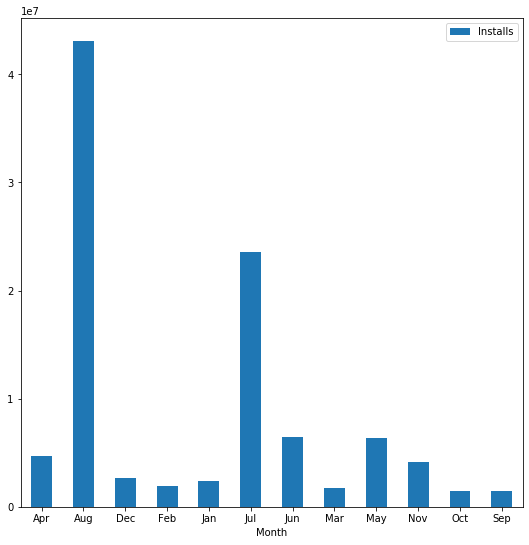

In [0]:
#Plot Reviews Versus Month to see which month has higher reviews
Average_Installs.plot.bar(x='Month', y='Installs', rot=0)

From the above plots it is clear that there is more number of downloads during the months of August with highest peak and second highest peak is during july. Which is during summer. Therefore, it would be ideal for the developers to develop their applications during Summer.

#c

#Regression to Predict Installations:
Here we are trying to predict the Installations based on various factors such as Price, Size, Ratings, Reviews, Content Rating.
This is to see if these factors influence Installations. 

In [0]:
Play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Jan
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Jan
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Aug
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Jun
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Jun


In [0]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [0]:
Play = pd.get_dummies(Play, columns=['Type'])

In [0]:
Play.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Type_0,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Jan,0,1,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Jan,0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Aug,0,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Jun,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Jun,0,1,0


In [0]:
Play = Play.fillna(0)

In [0]:
Play= Play.reindex(columns=['Rating', 'Reviews', 'Price','Size','Type_0','Type_Free','Type_Paid','Installs'])
Play_norm = (Play - Play.mean()) / (Play.max() - Play.min())
Play_norm.head()

,Rating,Reviews,Price,Size,Type_0,Type_Free,Type_Paid,Installs
0,0.095656,-0.005681,-0.002569,0.008466,-0.000092,0.0739,-0.073808,-0.015455
1,0.055656,-0.005671,-0.002569,-0.041534,-0.000092,0.0739,-0.073808,-0.014965
2,0.215656,-0.004563,-0.002569,-0.094534,-0.000092,0.0739,-0.073808,-0.010465
3,0.175656,-0.002924,-0.002569,0.068466,-0.000092,0.0739,-0.073808,0.034535
4,0.135656,-0.005671,-0.002569,-0.153534,-0.000092,0.0739,-0.073808,-0.015365


In [0]:
X = Play_norm[['Rating', 'Reviews', 'Price','Size','Type_0','Type_Free','Type_Paid']]
y = Play_norm['Installs']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Algorithm

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Rating,1.113545e-02
Reviews,1.406482e+00
Price,1.982847e-04
Size,-2.022869e-02
Type_0,1.618851e-33
Type_Free,3.932038e-03
Type_Paid,-3.932038e-03


In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4041,0.484535,0.131367
9280,-0.015455,-0.005903
2154,-0.015464,-0.011783
4737,-0.015415,-0.008593
7519,-0.005465,0.003321
...,...,...
9732,-0.015455,-0.016543
10164,-0.015464,-0.005747
6981,-0.015455,-0.008309
7999,-0.015460,-0.011744


Evaluating the Algorithm

In [0]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

Mean Absolute Error: 0.015
Mean Squared Error: 0.004
Root Mean Squared Error: 0.061
